In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [6]:
#extra
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
dataset = pd.read_csv('/content/Heart_Disease_Prediction.csv',sep=',',encoding="utf-8")

In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
dataset.shape

(270, 14)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [13]:
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [14]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [15]:
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [16]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [17]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [18]:
dataset.apply(lambda x:len(x.unique()))

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [19]:
print('Chest pain type',dataset['Chest pain type'].unique())
print('FBS over 120',dataset['FBS over 120'].unique())
print('EKG results ',dataset['EKG results'].unique())
print('Exercise angina ',dataset['Exercise angina'].unique())
print('Slope of ST ',dataset['Slope of ST'].unique())
print('Number of vessels fluro ',dataset['Number of vessels fluro'].unique())
print('Thallium ',dataset['Thallium'].unique())

Chest pain type [4 3 2 1]
FBS over 120 [0 1]
EKG results  [2 0 1]
Exercise angina  [0 1]
Slope of ST  [2 1 3]
Number of vessels fluro  [3 0 1 2]
Thallium  [3 7 6]


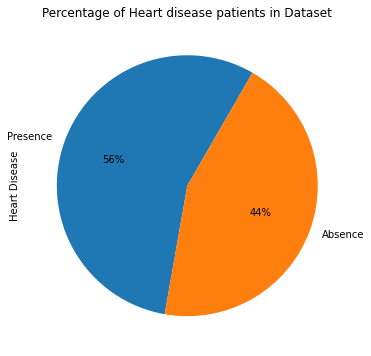

In [22]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(15,6))

ax1 = dataset['Heart Disease'].value_counts().plot.pie( x="Heart disease" ,y ="no.of patients", 
                   autopct = "%1.0f%%",labels=["Presence","Absence"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

In [20]:
y = dataset["Heart Disease"]

Absence     150
Presence    120
Name: Heart Disease, dtype: int64


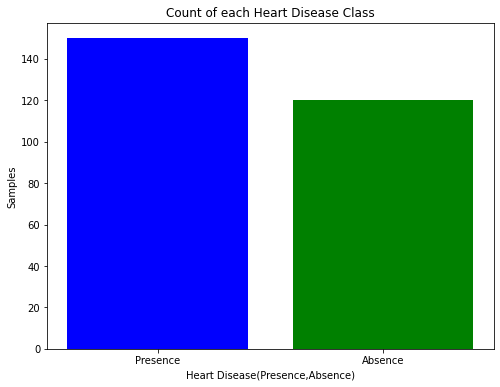

In [21]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Heart Disease'].unique(), dataset['Heart Disease'].value_counts(), color = ['blue', 'green'])
plt.xticks(["Presence","Absence"])
plt.xlabel('Heart Disease(Presence,Absence)')
plt.ylabel('Samples')
plt.title('Count of each Heart Disease Class')
target_temp = dataset['Heart Disease'].value_counts()
print(target_temp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a002fad90>,
      dtype=object)

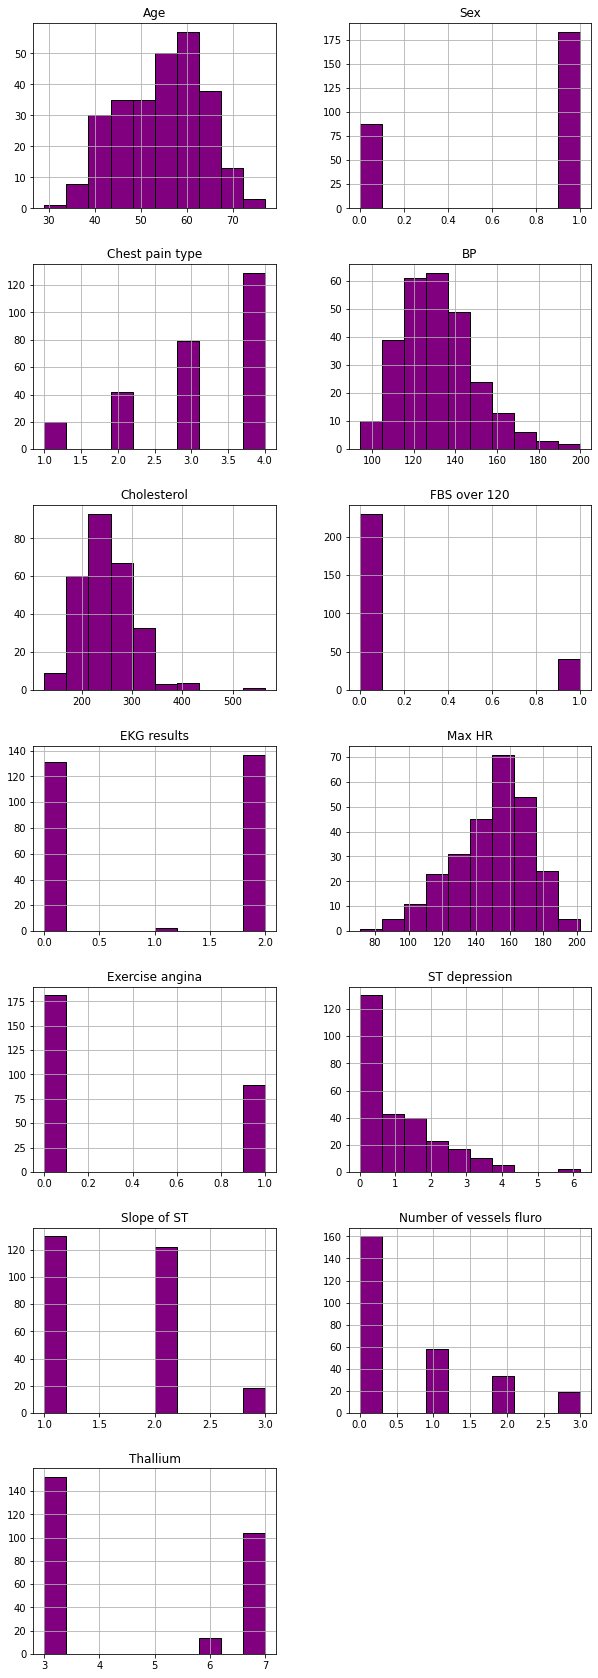

In [23]:
dataset.hist(edgecolor='black',layout = (7, 2),
            figsize = (10, 30),
            color=['purple'])

In [25]:
dataset["Sex"].unique()

array([1, 0])

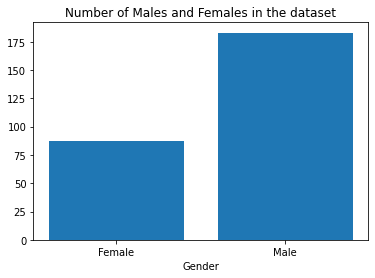

In [24]:
# Number of males and females
F = dataset[dataset["Sex"] == 0].count()["Heart Disease"]
M = dataset[dataset["Sex"] == 1].count()["Heart Disease"]

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

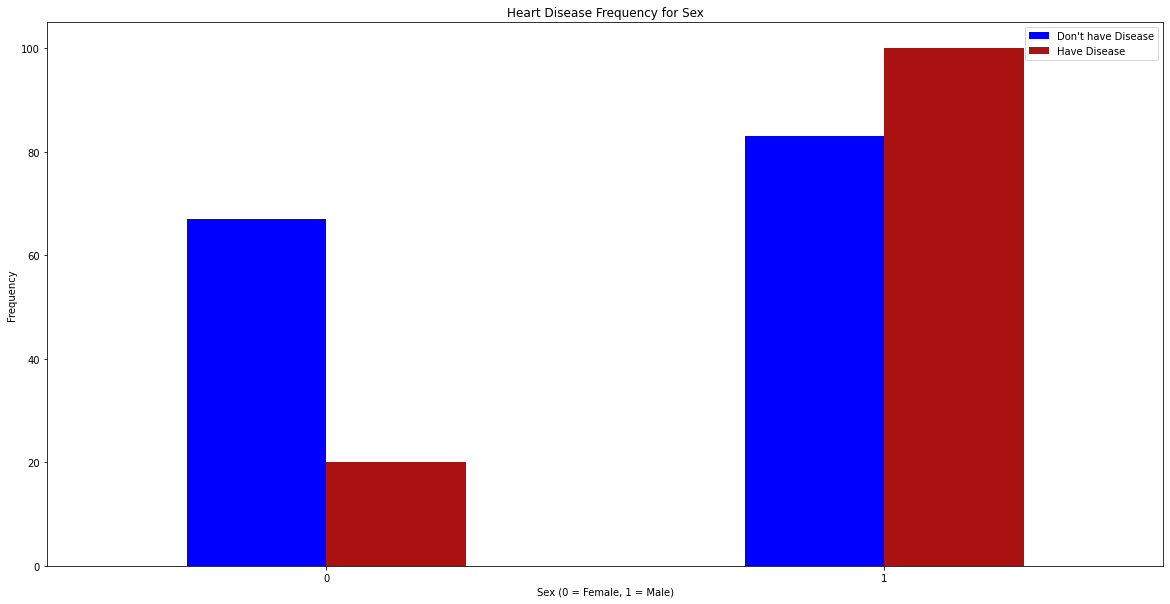

In [26]:
pd.crosstab(dataset['Sex'],dataset['Heart Disease']).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [28]:
countFemale = len(dataset[dataset.Sex == 0])
countMale = len(dataset[dataset.Sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(dataset.Sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(dataset.Sex))*100))

Percentage of Female Patients:32.22%
Percentage of Male Patients:67.78%


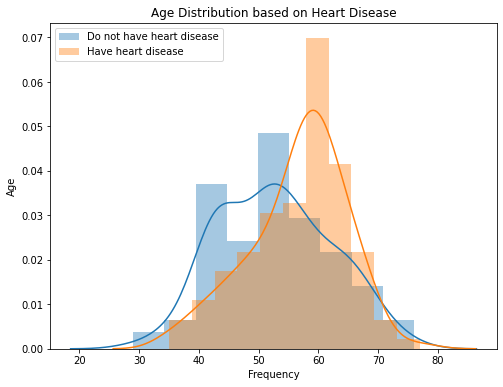

In [27]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['Heart Disease'] == "Absence"]['Age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['Heart Disease'] == "Presence"]['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()


In [31]:
print('Min age of people who do not have heart disease: ', min(dataset[dataset['Heart Disease'] == "Absence"]['Age']))
print('Max age of people who do not have heart disease: ', max(dataset[dataset['Heart Disease'] == "Absence"]['Age']))
print('Average age of people who do not have heart disease: ', dataset[dataset['Heart Disease'] == "Absence"]['Age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [30]:
print('Min age of people who have heart disease: ', min(dataset[dataset['Heart Disease'] == "Presence"]['Age']))
print('Max age of people who have heart disease: ', max(dataset[dataset['Heart Disease'] == "Presence"]['Age']))
print('Average age of people who have heart disease: ', dataset[dataset['Heart Disease'] == "Presence"]['Age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


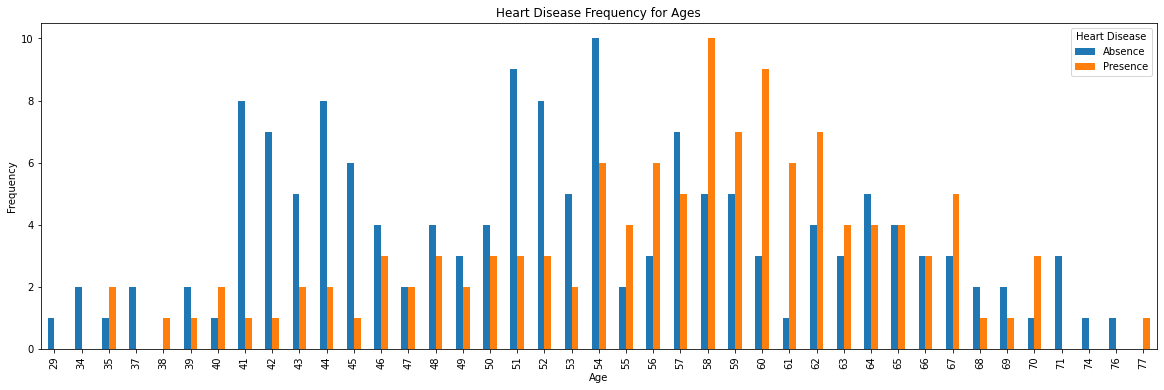

In [29]:
pd.crosstab(dataset.Age,dataset['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

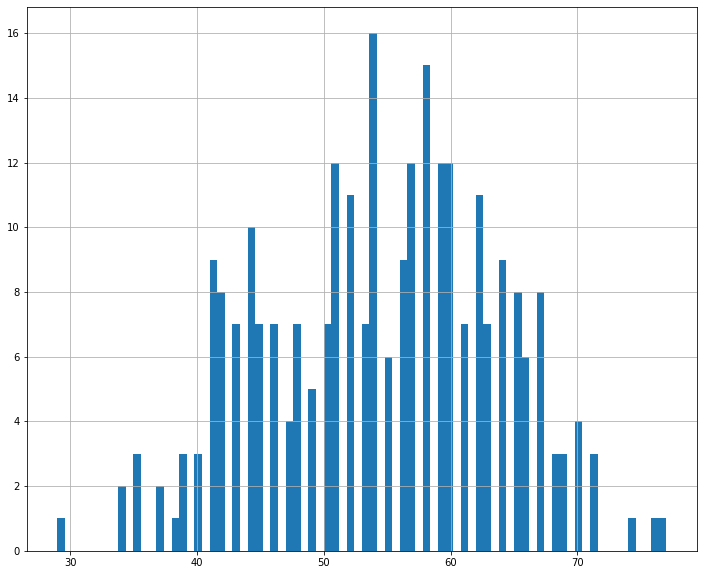

In [32]:
plt.figure(figsize=(12, 10))
dataset.Age.hist(bins=80)

In [33]:
print(f"The most of the patients have a mean age of : {dataset.Age.mean()}")

The most of the patients have a mean age of : 54.43333333333333


In [34]:
categorial = [('Sex', ['female', 'male']), 
              ('Chest pain type', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('FBS over 120', ['fbs > 120mg', 'fbs < 120mg']), 
              ('EKG results', ['normal', 'ST-T wave', 'left ventricular']), 
              ('Exercise angina', ['yes', 'no']), 
              ('Slope of ST', ['upsloping', 'flat', 'downsloping']), 
              ('Thallium', ['normal', 'fixed defect', 'reversible defect'])]

In [35]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [42]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=dataset, ax=axes[ax_index][0])
    sns.countplot(x='Heart Disease', hue=attribute, data=dataset, ax=axes[ax_index][1])
    avg = dataset[[attribute, 'Heart Disease']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Heart Disease', hue=attribute, data=dataset, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

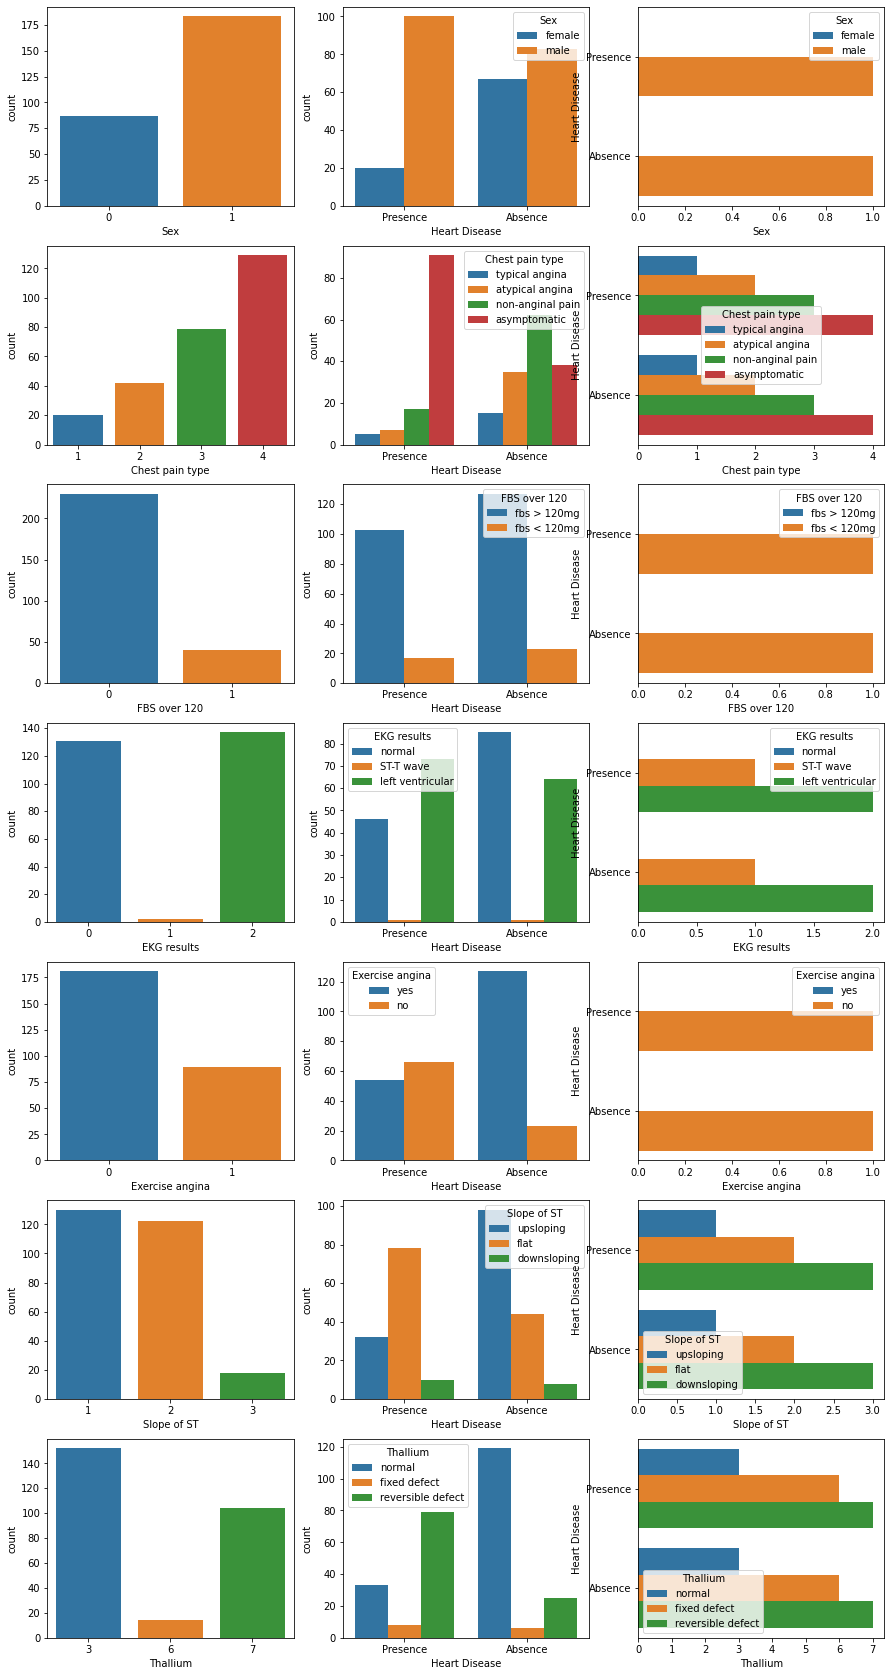

In [43]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))
plotGrid(True)

In [44]:
continuous = [('BP', 'blood pressure in mm Hg'), 
              ('Cholesterol', 'serum cholestoral in mg/d'), 
              ('Max HR', 'maximum heart rate achieved'), 
              ('ST depression', 'ST depression by exercise relative to rest'), 
              ('Slope of ST', '# major vessels: (0-3) colored by flourosopy')]

In [46]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(dataset[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Heart Disease', y=attribute, data=dataset, ax=axes[ax_index][1])

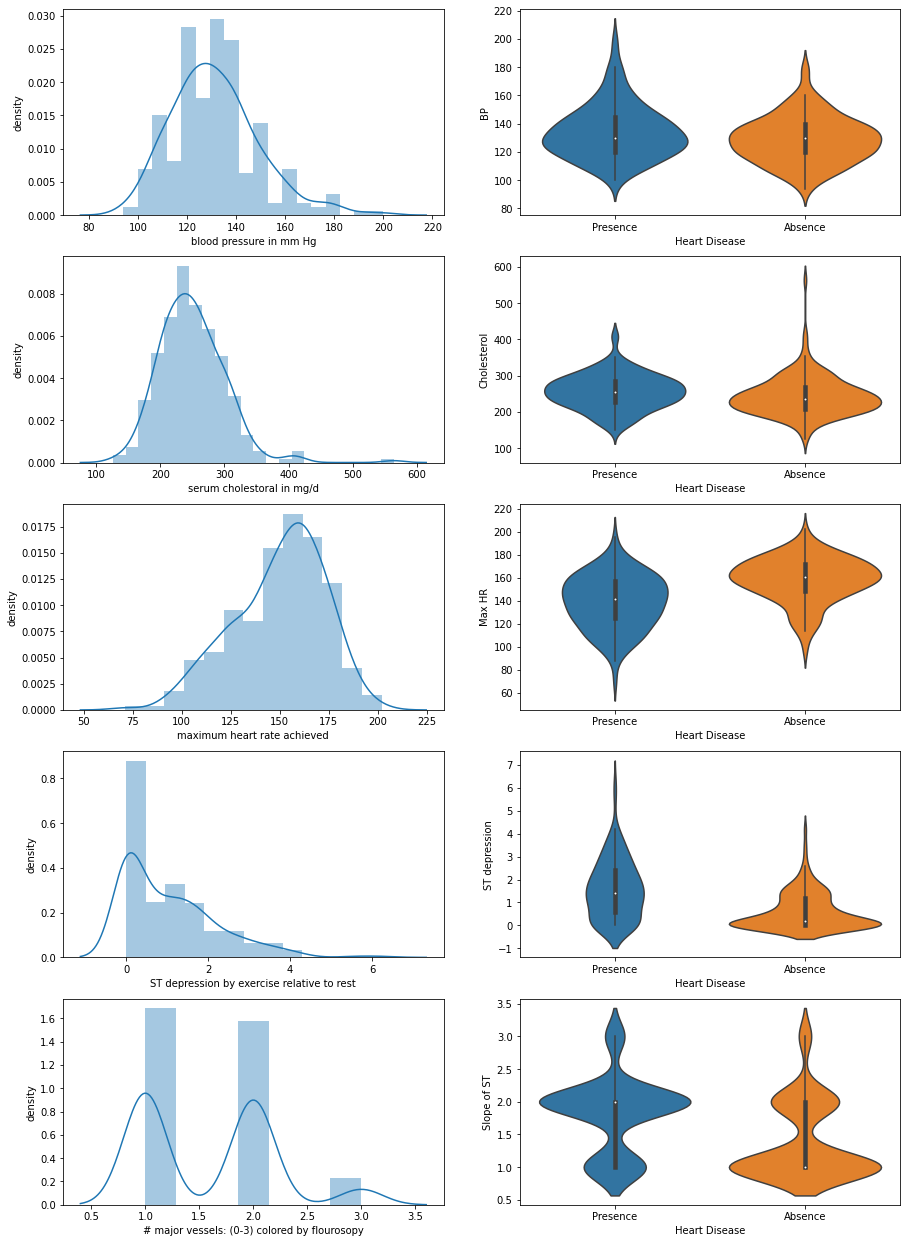

In [47]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

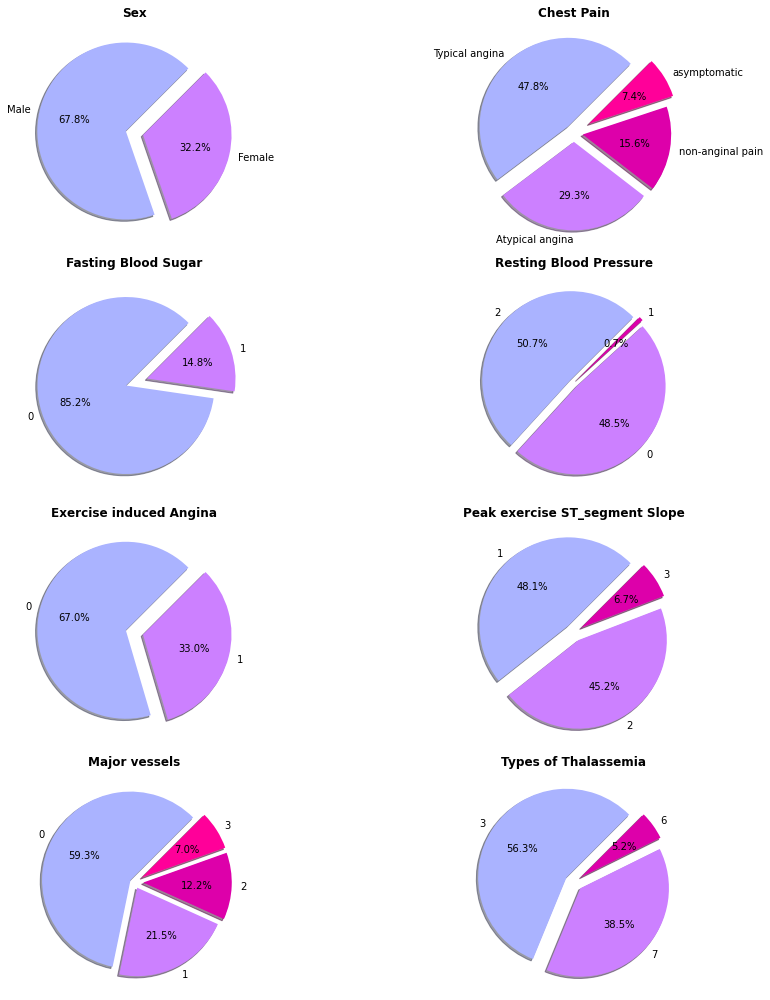

<Figure size 576x432 with 0 Axes>

In [48]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = dataset['Sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = dataset['Chest pain type'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['FBS over 120'].value_counts().index.tolist()[:2]
values = dataset['FBS over 120'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['EKG results'].value_counts().index.tolist()[:3]
values = dataset['EKG results'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['Exercise angina'].value_counts().index.tolist()[:2]
values = dataset['Exercise angina'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['Slope of ST'].value_counts().index.tolist()[:3]
values = dataset['Slope of ST'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['Number of vessels fluro'].value_counts().index.tolist()[:4]
values = dataset['Number of vessels fluro'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = dataset['Thallium'].value_counts().index.tolist()[:3]
values = dataset['Thallium'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1],colors=['#AAb3ff','#CC80FF','#DD00AA'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

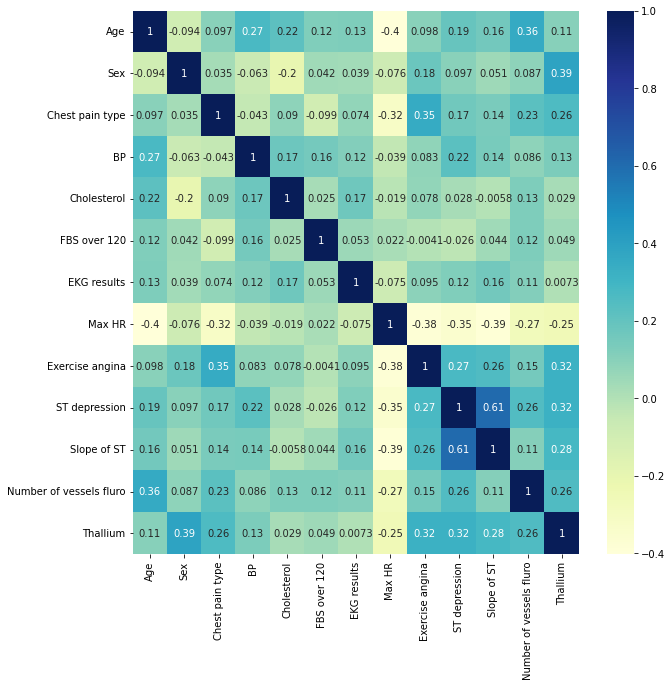

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(dataset.corr()), cmap="YlGnBu", annot=True);
plt.savefig("TargetCorrelations.png")

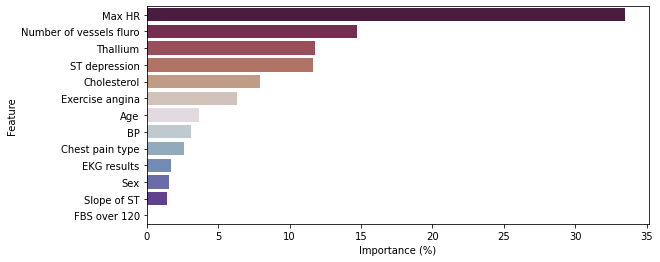

In [53]:
X = dataset.drop('Heart Disease',axis=1)
Y = dataset['Heart Disease']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

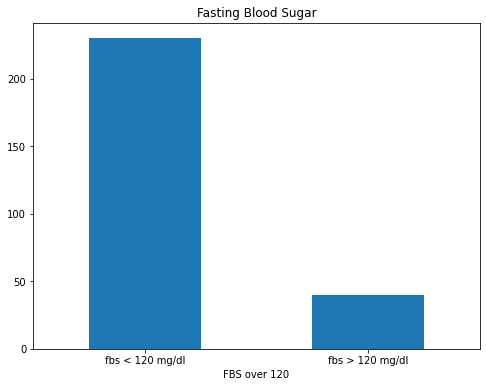

In [65]:
# Display fasting blood sugar in bar chart
dataset.groupby(dataset['FBS over 120']).count()['Heart Disease'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

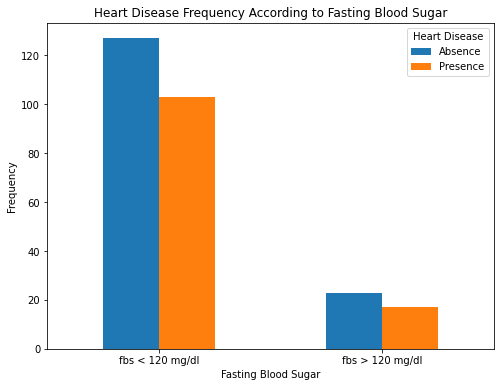

In [67]:
pd.crosstab(dataset['FBS over 120'],dataset['Heart Disease']).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [68]:
dataset["Chest pain type"].unique()

array([4, 3, 2, 1])

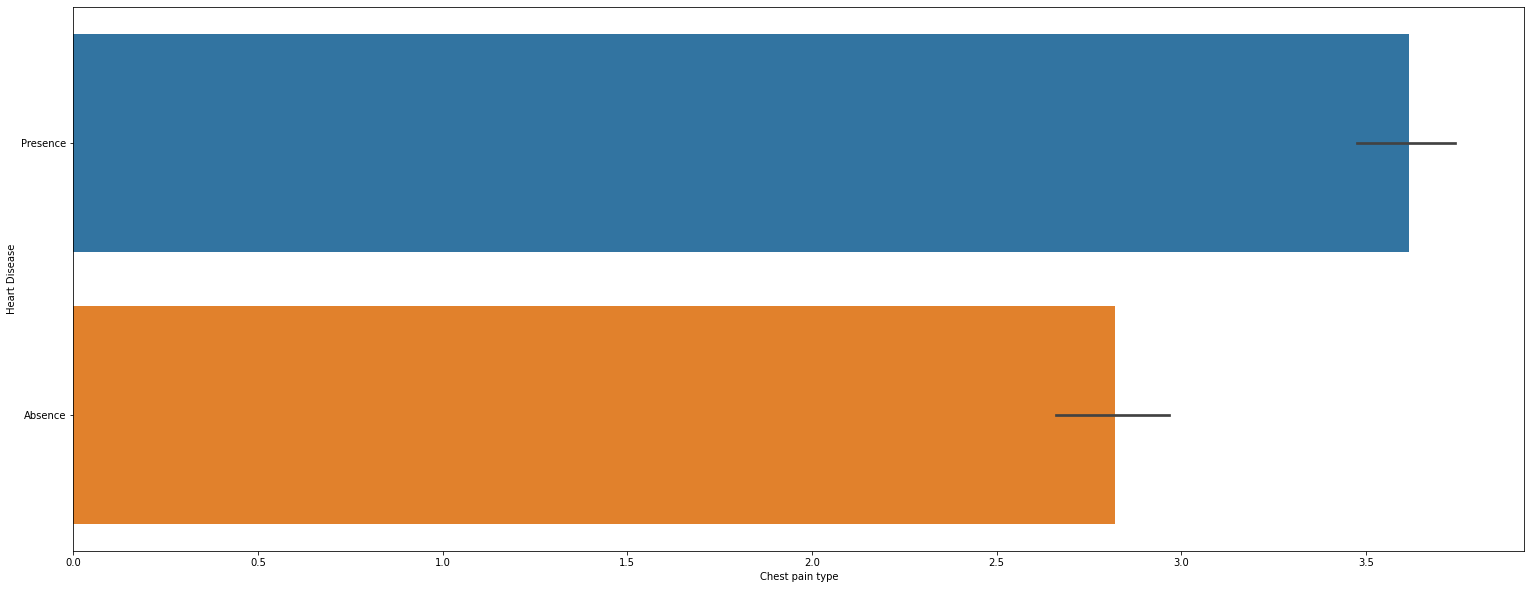

In [69]:
plt.figure(figsize=(26, 10))
sns.barplot(dataset["Chest pain type"],y)

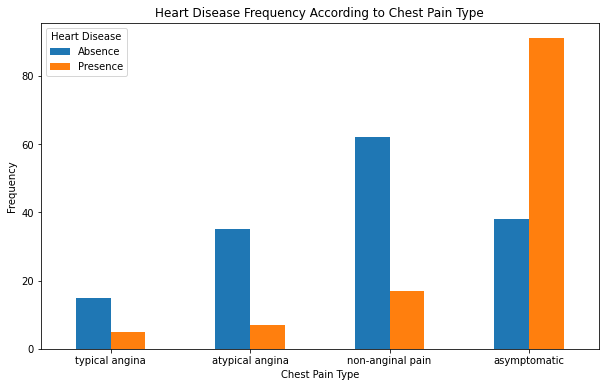

In [71]:
pd.crosstab(dataset['Chest pain type'],dataset['Heart Disease']).plot(kind = "bar", figsize = (10, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [72]:
dataset["BP"].unique()

array([130, 115, 124, 128, 120, 110, 140, 150, 135, 142, 134, 112, 132,
       138, 160, 170, 144, 122, 152, 101, 126, 118, 136, 105, 174, 145,
       108, 156, 106, 104,  94, 146, 148, 178, 125, 100, 165, 180, 158,
       200, 117, 192, 123, 129, 102, 155, 172])

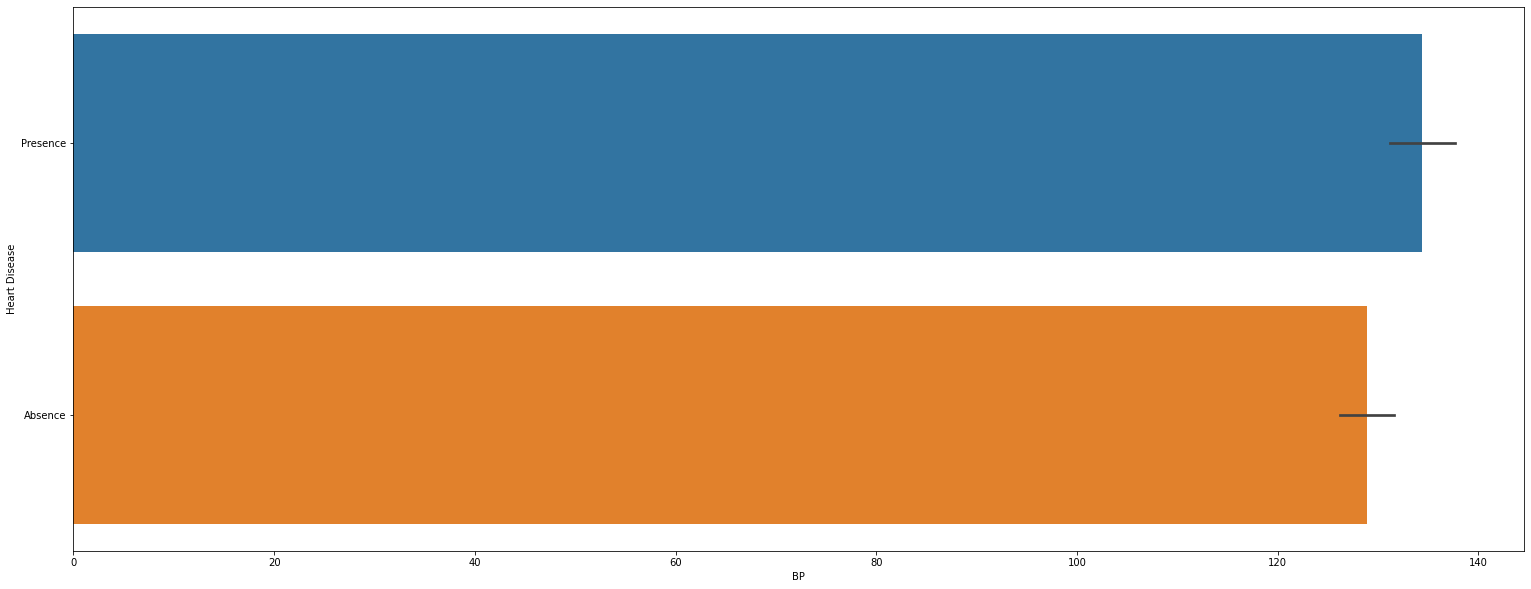

In [73]:
plt.figure(figsize=(26, 10))
sns.barplot(dataset["BP"],y)

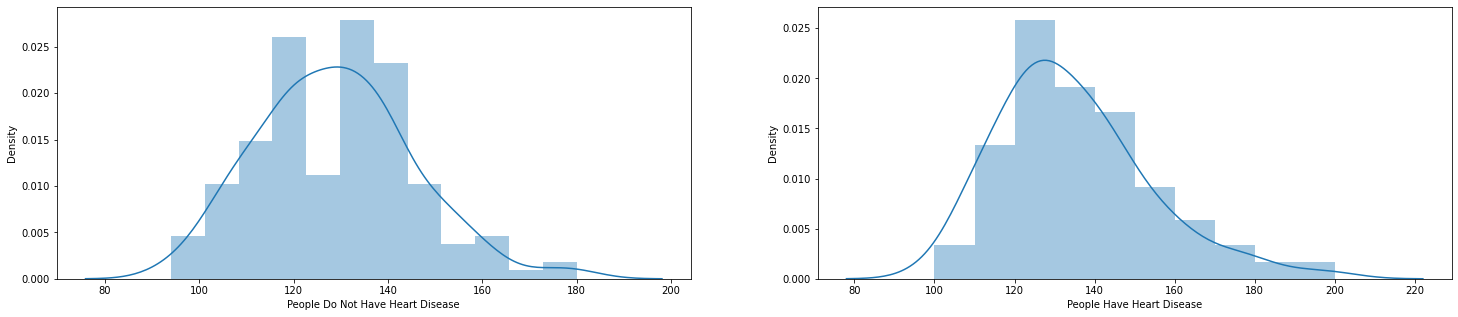

In [74]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(dataset[dataset['Heart Disease'] == "Absence"]['BP'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['Heart Disease'] == "Presence"]['BP'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [75]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(dataset[dataset['Heart Disease'] == "Absence"]['BP']))
print('Max blood pressure of people who do not have heart disease: ', max(dataset[dataset['Heart Disease'] == "Absence"]['BP']))
print('Average blood pressure of people who do not have heart disease: ', dataset[dataset['Heart Disease'] == "Absence"]['BP'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [76]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(dataset[dataset['Heart Disease'] == "Presence"]['BP']))
print('Max blood pressure of people who have heart disease: ', max(dataset[dataset['Heart Disease'] == "Presence"]['BP']))
print('Average blood pressure of people who have heart disease: ', dataset[dataset['Heart Disease'] == "Presence"]['BP'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666


In [77]:
dataset["EKG results"].unique()

array([2, 0, 1])

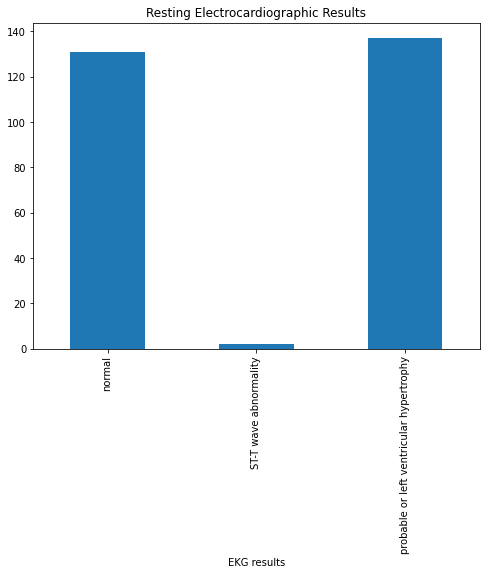

In [78]:
# Display electrocardiographic results in bar chart
dataset.groupby(dataset['EKG results']).count()['Heart Disease'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

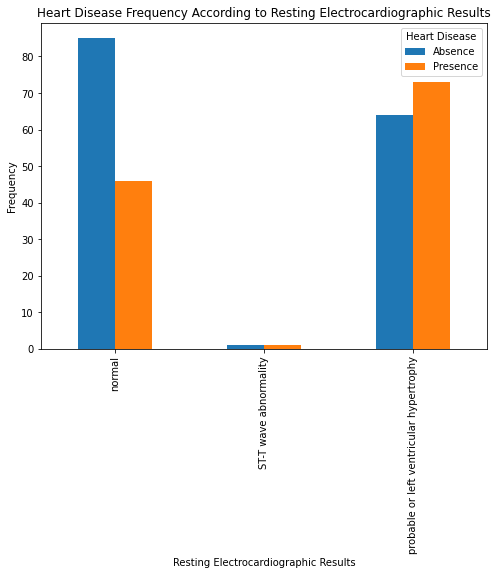

In [79]:
# Display resting electrocardiographic results based on the target
pd.crosstab(dataset['EKG results'],dataset['Heart Disease']).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

In [80]:
dataset["Exercise angina"].unique()

array([0, 1])

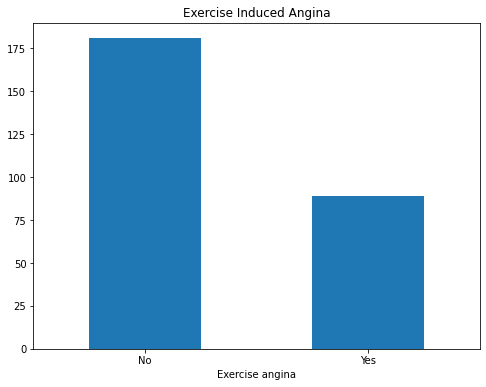

In [81]:
# Display exercise induced angina in bar chart
dataset.groupby(dataset['Exercise angina']).count()['Heart Disease'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

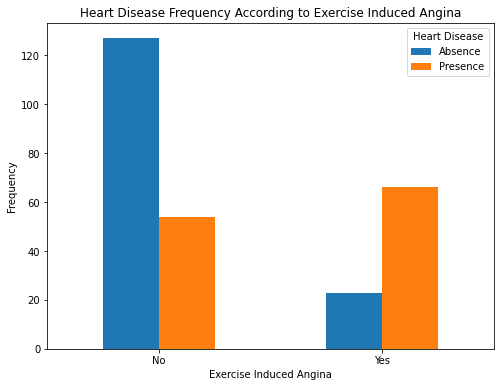

In [82]:
pd.crosstab(dataset['Exercise angina'],dataset['Heart Disease']).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [83]:
dataset["Slope of ST"].unique()

array([2, 1, 3])

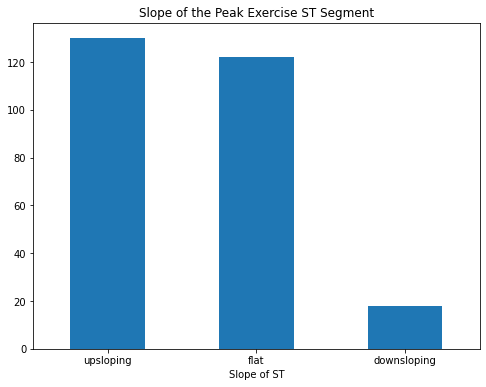

In [84]:
# Display slope of the peak exercise ST segment in bar chart
dataset.groupby(dataset['Slope of ST']).count()['Heart Disease'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()